<a href="https://colab.research.google.com/github/Flor-Si/Trabajos/blob/main/TP17-Notebook_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science



In [1]:
#import emoji
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.7 MB/s eta 0:00:00


Recordemos que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En clases anteriores, trabajamos con el dataset `StudentPerformace`. Pudimos observar el tipo de datos que teniamos y le hiciemos algunas transformaciones.

Llego la hora de utilizar los conceptos de aprendizaje supervisado para hacer predicciones sobre alguna variable en el dataset.

Para poder ajustar modelos de Machine Learning, la herramienta más sencilla y más utilizada es `scikit-learn`. Esta librería es muy utilizada ya que contiene funciones desarrolladas para la mayoría de los modelos de machine learning. Además `Scikit-learn` tienen una amplia y muy buena [documentación](https://scikit-learn.org/stable/).

<font size=5> 🚀 👩🏽‍💻 Machine Learning: Aprendizaje Supervisado 📣</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [3]:
import os

In [4]:
os.getcwd()

'/content'

Primero, vamos a leer los datos limpios y procesados.

In [5]:
# Leemos nuevamente los datos de los estudiantes
students = pd.read_csv('/content/estudiantes_limpio.csv')

In [6]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,72.0,72,74,73.0,1,0,0,1,0,0,0,0
1,2,1,0,69.0,90,88,89.0,1,0,0,0,0,0,1,0
2,1,1,1,90.0,95,93,94.0,1,0,0,0,0,1,0,0
3,0,0,1,47.0,57,44,50.5,0,1,1,0,0,0,0,0
4,2,1,1,76.0,78,75,76.5,0,1,0,0,0,0,1,0


Antes que nada, chequeemos nuevamente que eliminamos todos los valores faltantes.

In [7]:
students.isnull().sum()

,0
race/ethnicity,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
english score,0
female,0
male,0
associate's degree,0


Ahora tenemos que decidir que variable o variables vamos a predecir. Esto quiere decir que tenemos que elegir cual va a ser la variable que al predecirla conteste la pregunta que nos hicimos de los datos.

Lo que queremos saber es:

1. ¿Qué puntaje final obtendra un estudiante?
2. Dado un estudiante, ¿aprobara o no el examen?

**_¿Qué tipo de problemas estamos tratando de resolver?_**

Para contestar estas preguntas vamos a obtener dos nuevas variables:

1. El puntaje final: Lo obtendremos promediando los tres puntajes (matematica, lectura y escritura)
2. Aprobado: Una etiqueta que me permita saber si cada estudiante del dataset aprobo el examen (puntaje final >= 60) o no lo aprobo (puntaje final < 60).

## 🟢 🟣 🟡 Clasificación

Contestaremos ahora la pregunta 2. Este problema es un problema de clasificación (_¿Por qué?_)

Lo primero que veremos es si tenemos un desbalance de clases. Es muy importante ver que no tenemos una clase minoritaria, ya que esto afectaria el algoritmo. En nuestro caso, que trabajamos con una clasificación binaria, tener un desbalance de clases implica que tenemos menos del 10% de nuestros datos que pertenecen a una de las clases.

In [ ]:
students['aprobado'] = students['puntaje_final'].apply(lambda x: 0 if x < 60 else 1)

KeyError: 'puntaje_final'

In [ ]:
print(students.columns)

Index(['race/ethnicity', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score', 'english score', 'female', 'male',
       'associate's degree', 'bachelor's degree', 'high school',
       'master's degree', 'some college', 'some high school'],
      dtype='object')


In [ ]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,puntaje_final,aprobado
0,2,1,1,56.338028,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,78.112676,1
1,1,1,0,85.915493,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,91.305164,1
2,0,0,0,25.352113,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,42.117371,0
3,2,1,0,66.197183,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,73.065728,1
4,1,1,0,59.154930,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,73.384977,1


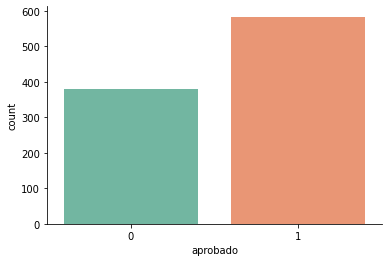

In [ ]:
sns.countplot(x=students['aprobado'], palette='Set2')
sns.despine()

In [ ]:
students['aprobado'].value_counts() / students['aprobado'].size * 100

1    60.602911
0    39.397089
Name: aprobado, dtype: float64

Como vemos que no tenemos un desbalance, podemos continuar.

#### Seleccion de target (y) y variables (X)

Ahora seleccionaremos las variables o features que deseemos usar como variable independientes y la variable a predecir.

Usaremos todas las variables menos aquellas que fueron usadas para calcular el puntaje final. Debemos también asegurarnos de no incluir las variables a predecir. Como variable a predecir usaremos `aprobado`.

In [ ]:
xc = students.drop(['math score', 'reading score', 'writing score', 'english score', 'puntaje_final', 'aprobado'],
                  axis=1)

In [ ]:
yc = students['aprobado']

In [ ]:
xc, yc = np.array(xc), np.array(yc)

#### Separando Train / Test

Separamos nuevamente el dataset en entrenamiento y testeo o evaluación.

In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(xc, yc, test_size=0.2,
                                                    random_state=42)

### Clasificador kNN

### Clasificador kNN

Para realizar la clasificación utilizaremos el algoritmo de los k-vecinos más cercanos.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# metricas
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
# Entrenamos el modelo
knn.fit(X_train_c, y_train_c);

In [ ]:
# Predecimos
predicciones_cla = knn.predict(X_test_c)

In [ ]:
accuracy = accuracy_score(y_train_c, predicciones_cla)*100
print(f'{round(accuracy, 2)}%')

71.52%


### Random Forest

Ahora utilizaremos Random Forest, pero en su versión Clasificacion.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_cla = RandomForestClassifier()

In [ ]:
# Entrenamos el modelo
rf_cla.fit(X_train_c, y_train_c);

In [ ]:
# Predecimos
predicciones_rf = rf_cla.predict(X_test_c)

In [ ]:
accuracy = accuracy_score(y_train_c, predicciones_rf)*100
print(f'{round(accuracy, 2)}%')

71.52%
